In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import xlsxwriter
import pandas_flavor as pf

In [5]:

file_path = r'C:\Users\fguar\OneDrive\Documentos\VS Code\Python\Docente activo\Encuestas creencias DA 2024 (Responses) - Form Responses 1.csv'
my_data = pd.read_csv (file_path)

In [6]:
variable_names = my_data.columns.tolist()
print(variable_names)

['Timestamp', '¿Cuál es tu comuna de residencia?', '¿Vives en zona urbana o rural?', '¿Qué edad tienes?', '¿Con qué género te identificas?', '¿Cómo te enteraste del programa?', '¿En qué espacio educativo trabajas?', '¿Qué enseñas en tu espacio educativo?', '¿A rango de edades enseñas?', 'I. Por favor indica tu grado de acuerdo a las siguientes afirmaciones que se refieren a tu percepción sobre bienestar y naturaleza. [Me siento parte del ecosistema natural.]', 'I. Por favor indica tu grado de acuerdo a las siguientes afirmaciones que se refieren a tu percepción sobre bienestar y naturaleza. [Me siento más cómodo en la ciudad que en la naturaleza.]', 'I. Por favor indica tu grado de acuerdo a las siguientes afirmaciones que se refieren a tu percepción sobre bienestar y naturaleza. [Suelo emocionarme cuando veo un paisaje hermoso.]', 'I. Por favor indica tu grado de acuerdo a las siguientes afirmaciones que se refieren a tu percepción sobre bienestar y naturaleza. [Me siento agradecido p

In [7]:
import re

# Function to extract the name inside square brackets
def extract_name(name):
    match = re.search(r'\[(.*?)\]', name)
    if match:
        return match.group(1)
    else:
        return name

# Rename the columns
my_data = my_data.rename(columns=extract_name)

In [9]:
variable_labels = {
    "comuna": "¿Cuál es tu comuna de residencia?",
    "rango_edades_ensenanza": "¿A rango de edades enseñas?",
    "zona": "¿Vives en zona urbana o rural?",
    "edad": "¿Qué edad tienes?",
    "genero": "¿Con qué género te identificas?",
    "enterarse": "¿Cómo te enteraste del programa?",
    "espacio_educativo": "¿En qué espacio educativo trabajas?",
    "ensenanza": "¿Qué enseñas en tu espacio educativo?",
    "I.BYN_1": "Me siento parte del ecosistema natural.",
    "I.BYN_2": "Me siento más cómodo en la ciudad que en la naturaleza.",
    "I.BYN_3": "Suelo emocionarme cuando veo un paisaje hermoso.",
    "I.BYN_4": "Me siento agradecido por los regalos que la naturaleza nos da.",
    "I.BYN_5": "La naturaleza me hace sentir intranquilo y alerta.",
    "I.BYN_6": "Tengo un lugar especial en la naturaleza que me gusta visitar",
    "I.BYN_7": "Siento que tengo una conexión especial con un lugar en la naturaleza.",
    "I.BYN_8": "Es normal y parte del progreso que en un lugar natural cambie o tenga que desaparecer.",
    "I.BYN_9": "Creo que es importante proteger la naturaleza para las generaciones futuras.",
    "I.BYN_10": "No me siento responsable del cuidado de la naturaleza.",
    "I.BYN_11": "Me gusta aprender sobre la naturaleza y cómo funciona.",
    "II.CTA_1": "Creo que la creatividad abunda entre niños/as y adolescentes de mi espacio educativo",
    "II.CTA_2": "Las ideas de mis estudiantes me ayudan a explicar contenidos o desarrollar actividades con mayor riqueza educativa",
    "II.CTA_3": "A menudo me veo comentando con colegas o familiares comentarios ingeniosos de mis estudiantes",
    "II.CTA_4": "Mi disciplina/asignatura no me permite llevar a cabo actividades creativas con estudiantes",
    "II.CTA_5": "Cuando un estudiante tiene una idea creativa es importante que la comparta con el curso",
    "II.CTA_6": "Disfruto cuando un/a estudiante presenta una respuesta o trabajo creativo",
    "II.CTA_7": "Las ideas creativas son premiadas en mi clase",
    "II.CTA_8": "Prefiero que estudiantes se concentren en las instrucciones las ideas creativas pueden ser disruptivas",
    "II.CTA_9": "Suelo mencionar la importancia de pensar \"fuera de la caja\" en mis clases",
    "III.IA_1": "Creo que el arte en sus diversas expresiones es un elemento secundario en desarrollo integral de niños niñas y adolescentes",
    "III.IA_2": "Me gusta dedicar tiempo a asistir a exposiciones de arte y eventos culturales",
    "III.IA_3": "Incluyo actividades artísticas en mis planes de enseñanza",
    "IV.TC_1": "Compartir ideas y soluciones con mis colegas me hace sentir más seguro en mi trabajo",
    "IV.TC_2": "A veces siento que mis colegas no valoran mis ideas o contribuciones",
    "IV.TC_3": "Compartir mis conocimientos con otros docentes me ayuda a fortalecer mi disciplina",
    "IV.TC_4": "Aprecio cuando otros docentes me dan retroalimentación sobre mi trabajo",
    "IV.TC_5": "Me gusta participar en proyectos de equipo que involucran a otros docentes y disciplinas",
    "IV.TC_6": "Me siento cómodo/a en un ambiente colaborativo donde todos los docentes tienen la oportunidad de participar",
    "IV.TC_7": "A veces siento que trabajar con mis colegas me complica más que me ayuda",
    "V.CC_1": "Me siento inseguro/a cuando debo enfrentar situaciones que requieren creatividad en el aula",
    "V.CC_2": "Siento que puedes generar ideas novedosas en el contexto escolar",
    "V.CC_3": "Me siento capaz de aplicar soluciones creativas a los problemas que se presentan en mi espacio educativo",
    "V.CC_4": "Mi formación académica me ha permitido desarrollar mi creatividad",
    "V.CC_5": "He participado en actividades creativas o artísticas fuera del contexto escolar en los últimos meses",
    "V.CC_6": "Me resulta difícil pensar en varias soluciones a un mismo problema o situación",
    "V.CC_7": "Creo que puedo generar ideas diferentes a las habituales en el contexto escolar",
    "V.CC_8": "Me cuesta adaptarme a los cambios en el entorno escolar",
    "V.CC_9": "Creo que puedo manejar situaciones imprevistas de manera creativa",
    "V.CC_10": "Me gustaría aprender nuevas técnicas creativas",
    "V.CC_11": "Estoy abierto/a a aprender cosas nuevas relacionadas con la creatividad",
    "V.CC_12": "Me cuesta probar nuevas ideas o soluciones en el contexto escolar",
    "VI.RN_1": "La interacción con la naturaleza ayuda a los/as estudiantes a desarrollar habilidades sociales y emocionales",
    "VI.RN_2": "La exposición a la naturaleza puede mejorar el rendimiento académico de los/as estudiantes en mi asignatura/disciplina",
    "VI.RN_3": "La interacción con la naturaleza debiera hacerse fuera del horario escolar",
    "VI.RN_4": "Me gusta pasar tiempo al aire libre",
    "VI.RN_5": "La lluvia o el frío son grandes impedimentos para disfrutar de la naturaleza",
    "VI.RN_6": "Me siento cómodo/a en espacios naturales como parques playas o bosques",
    "VI.RN_7": "Me gusta aumentar mis conocimientos sobre la flora y fauna de mi zona",
    "VI.RN_8": "Creo que es importante preservar la biodiversidad y los recursos naturales",
    "VI.RN_9": "Me gusta participar en campañas de limpieza de espacios naturales o reforestación",
    "VII.CL_1": "Considero importante conocer la historia cultura y tradiciones de mi zona",
    "VII.CL_2": "Creo que la cultura mapuche tiene mucho que enseñarnos",
    "VII.CL_3": "Valoro la riqueza cultural del mundo rural de mi zona y trato de incorporarla en mi trabajo como docente",
    "VII.CL_4": "Creo que la identidad local es importante para el aprendizaje y desarrollo de mis estudiantes",
    "VII.CL_5": "Considero que los estudiantes se sientan más motivados y comprometidos con su educación cuando se les enseña acerca de su identidad local",
    "VII.CL_6": "Es muy difícil incluir la identidad local en mis clases y actividades educativas",
    "VII.CL_7": "Me siento incómodo/a de participar en actividades comunitarias y/o culturales que se llevan a cabo en mi zona",
    "VII.CL_8": "Creo que es importante involucrarse en actividades de la comunidad relacionadas con el territorio y su entorno",
}

In [10]:
#Define helper function:
def data_label(data, label):
    return data[variable_labels[label]]

In [11]:
comuna_frequency = data_label(my_data, "comuna").value_counts()
print(comuna_frequency)

¿Cuál es tu comuna de residencia?
Pucón         7
Villarrica    6
Curarrehue    6
Name: count, dtype: int64


print(plt.style.available)

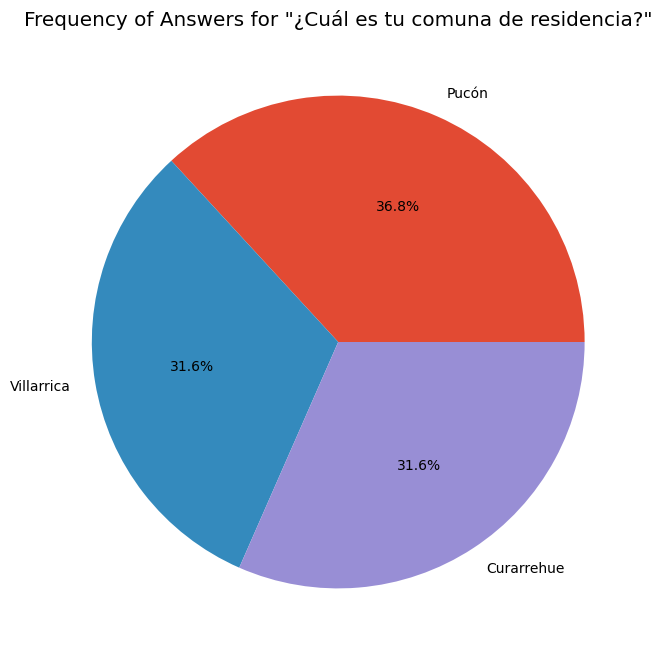

In [12]:
# Get the frequency of each unique value
comuna_frequency = data_label(my_data, "comuna").value_counts()

style.use('ggplot')

# Create the pie chart
plt.figure(figsize=(10, 8))
comuna_frequency.plot.pie(autopct='%1.1f%%')
plt.title('Frequency of Answers for "¿Cuál es tu comuna de residencia?"')
plt.ylabel('')  # Hide the y-axis label
plt.show()

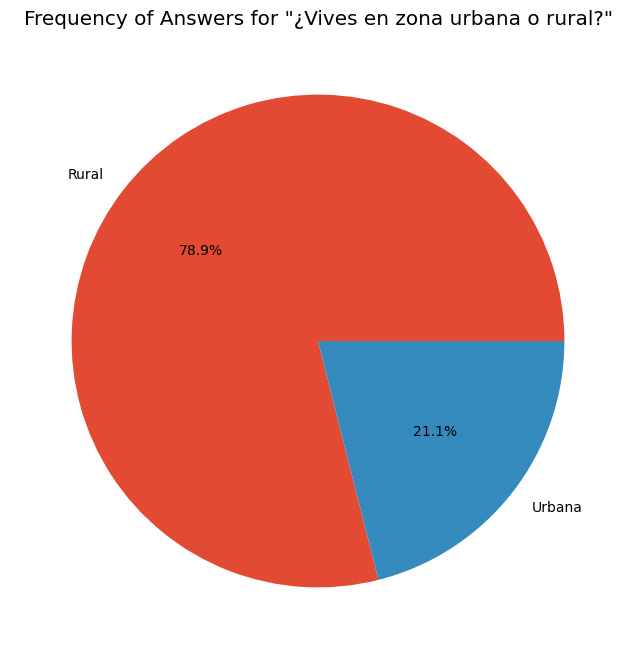

In [13]:
# Get the frequency of each unique value
Zona_freq = data_label(my_data, "zona").value_counts()

style.use('ggplot')

# Create the pie chart
plt.figure(figsize=(10, 8))
Zona_freq.plot.pie(autopct='%1.1f%%')
plt.title('Frequency of Answers for "¿Vives en zona urbana o rural?"')
plt.ylabel('')  # Hide the y-axis label
plt.show()

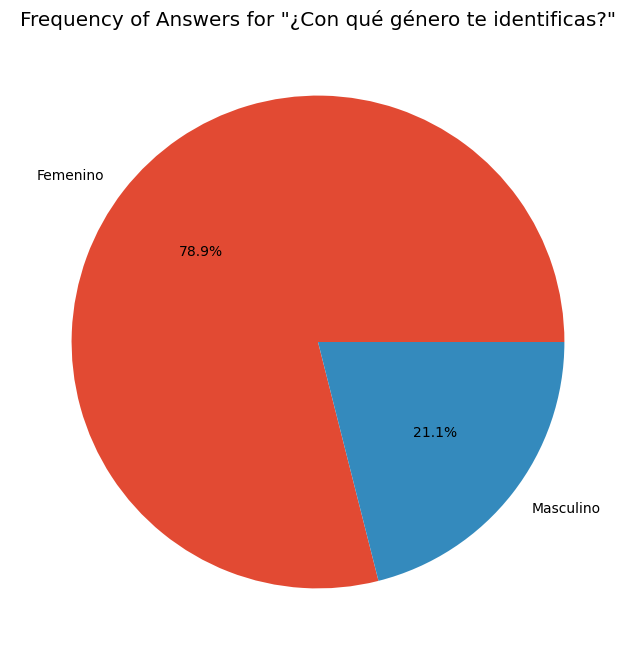

In [14]:
# Get the frequency of each unique value
genero_freq = data_label(my_data, "genero").value_counts()

style.use('ggplot')

# Create the pie chart
plt.figure(figsize=(10, 8))
genero_freq.plot.pie(autopct='%1.1f%%')
plt.title('Frequency of Answers for "¿Con qué género te identificas?"')
plt.ylabel('')  # Hide the y-axis label
plt.show()

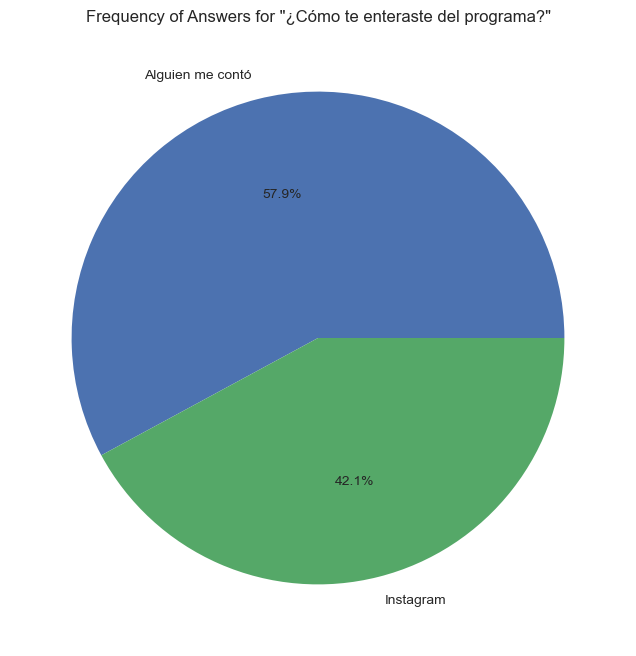

In [15]:
# Get the frequency of each unique value
enterarse_freq = data_label(my_data, "enterarse").value_counts()

style.use('seaborn-v0_8')

# Create the pie chart
plt.figure(figsize=(10, 8))
enterarse_freq.plot.pie(autopct='%1.1f%%')
plt.title('Frequency of Answers for "¿Cómo te enteraste del programa?"')
plt.ylabel('')  # Hide the y-axis label
plt.show()

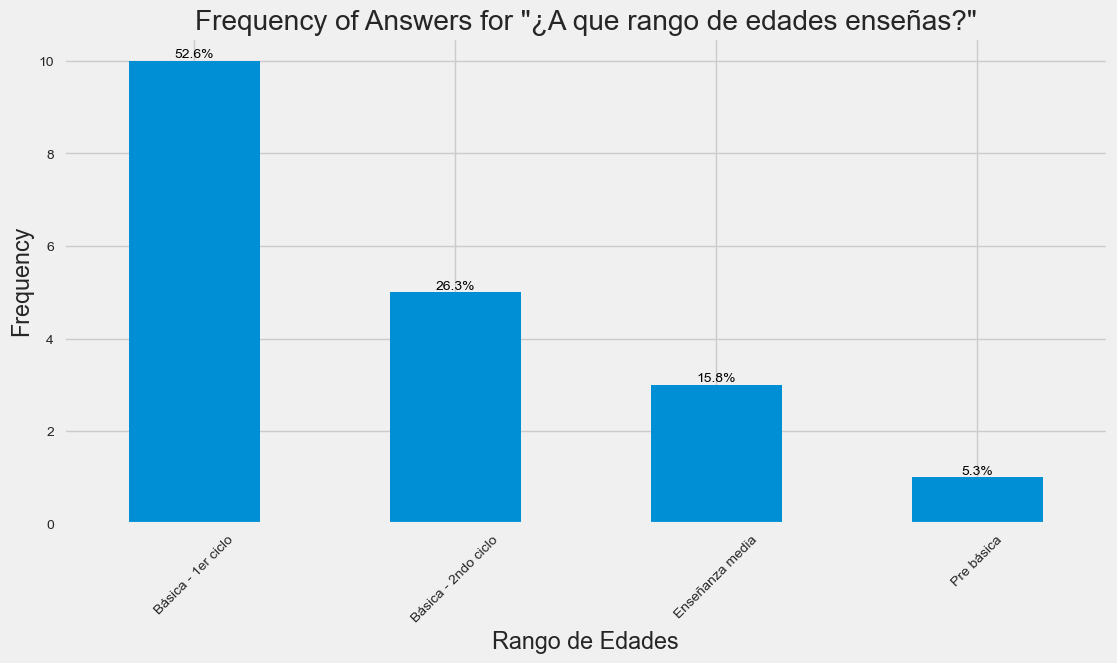

In [16]:
# Get the frequency of each unique value
edad_estu_freq = data_label(my_data, "rango_edades_ensenanza").value_counts()
style.use('fivethirtyeight')

# Calculate the percentage for each age range
total = edad_estu_freq.sum()
percentages = (edad_estu_freq / total) * 100

# Create the bar chart and store the Axes object in ax
plt.figure(figsize=(12, 6))
ax = edad_estu_freq.plot(kind='bar')
plt.title('Frequency of Answers for "¿A que rango de edades enseñas?"')
plt.xlabel('Rango de Edades')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate the x labels for better readability

# Annotate each bar with the percentage
for bar, percentage in zip(ax.patches, percentages):
    ax.annotate(f'{percentage:.1f}%', 
                (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                ha='center', va='bottom', fontsize=10, color='black')

plt.show()


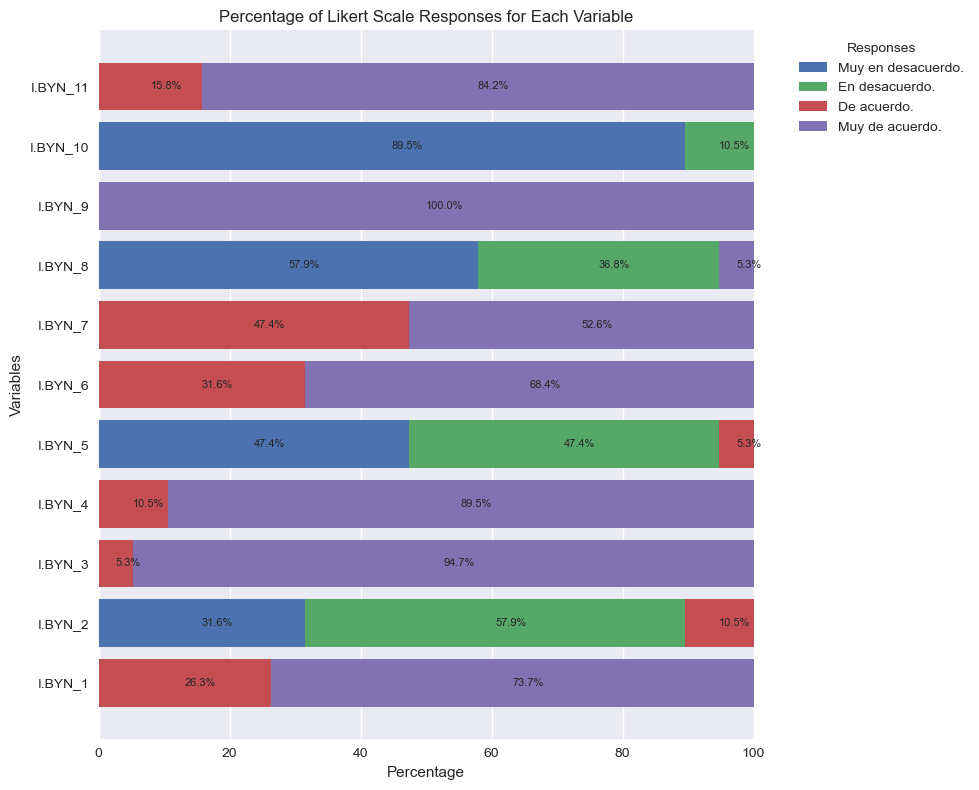

In [19]:

# Set the style
style.use('seaborn-v0_8')

# List of variables
variables = [
    "I.BYN_1", "I.BYN_2", "I.BYN_3", "I.BYN_4", "I.BYN_5",
    "I.BYN_6", "I.BYN_7", "I.BYN_8", "I.BYN_9", "I.BYN_10",
    "I.BYN_11"
]

# Likert scale responses
likert_scale = ['Muy en desacuerdo.', 'En desacuerdo.', 'De acuerdo.', 'Muy de acuerdo.']

# Calculate percentages
percentages = pd.DataFrame(index=likert_scale, columns=variables)

for var in variables:
    var_data = data_label(my_data, var)
    counts = var_data.value_counts(normalize=True) * 100
    percentages[var] = counts.reindex(likert_scale).fillna(0)

# Plotting
fig, ax = plt.subplots(figsize=(10, 8))

bottom = [0] * len(variables)

for i, response in enumerate(likert_scale):
    bars = ax.barh(variables, percentages.loc[response], left=bottom, label=response)
    for bar in bars:
        width = bar.get_width()
        if width > 0:  # Only add text if percentage is greater than 0
            ax.text(width/2 + bar.get_x(), bar.get_y() + bar.get_height()/2, f'{width:.1f}%', va='center', fontsize=8)
    bottom = [i+j for i, j in zip(bottom, percentages.loc[response])]

ax.set_xlim(0, 100)
ax.set_xlabel('Percentage')
ax.set_ylabel('Variables')
ax.set_title('Percentage of Likert Scale Responses for Each Variable')
ax.legend(title='Responses', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

In [24]:
value = variable_labels["I.BYN_1"]
print(value)

Me siento parte del ecosistema natural.
